### Calculating and Plotting Ongoing Drawdown of a Mixed Portfolio

Construct a portfolio with 60% weight in S&P 500 futures (ES=F) and 40% weight in US 10-year Treasury futures (ZN=F), calculate the logarithmic returns of the portfolio, compute the cumulative return, and plot the ongoing drawdown with the drawdown represented as a red area.

The, print the maximum drawdown, as well the other measures of return and risk: annualized return, annualized volatility, skewness and kurtosis.


In [27]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats

ticker1 = "ES=F"
ticker2 = "ZN=F"

sp500 = yf.download(ticker1)['Adj Close']
us_10y = yf.download(ticker2)['Adj Close']

portfolio = pd.DataFrame({'S&P 500' : sp500, '10y US Treasury' : us_10y}).dropna()
portfolio

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,S&P 500,10y US Treasury
Date,,
2000-09-21,1469.50,99.953133
2000-09-22,1468.50,99.828133
2000-09-25,1461.00,99.937500
2000-09-26,1443.00,100.187500
2000-09-27,1446.75,100.125000
...,...,...
2024-01-22,4881.00,111.500000
2024-01-23,4895.00,111.218750
2024-01-24,4898.00,110.968750


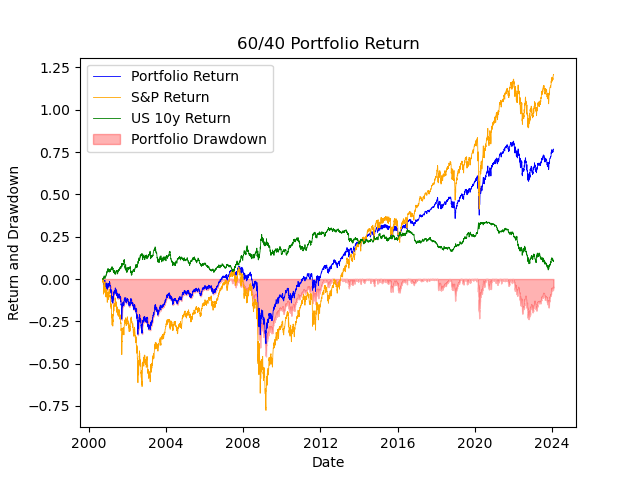

In [35]:
# Log Returns
portfolio['S&P 500_return'] = np.log(portfolio['S&P 500']).diff()
portfolio['US_10y_return'] = np.log(portfolio['10y US Treasury']).diff()

portfolio['Return'] = 0.6 * portfolio['S&P 500_return'] + 0.4 * portfolio['US_10y_return']

# Volatility
portfolio_volatility = np.round(portfolio.Return.std(),2)
SP500_volatility = np.round(portfolio['S&P 500_return'].std(),2)
US10y_volatility = np.round(portfolio['US_10y_return'].std(),2)

# Cumulative Log Returns
portfolio['cumulative_sp500_return'] = portfolio['S&P 500_return'].cumsum()
portfolio['cumulative_10y_US_return'] = portfolio['US_10y_return'].cumsum()
portfolio['cumulative_return'] = portfolio['Return'].cumsum()

# Drawdown calculation
rolling_max = portfolio['cumulative_return'].cummax()
portfolio['drawdown'] = rolling_max - portfolio['cumulative_return']

fig, ax = plt.subplots()
ax.fill_between(portfolio.index, -portfolio['drawdown'], color = 'red', alpha = 0.3, label = 'Portfolio Drawdown')
ax.plot(portfolio['cumulative_return'], label = 'Portfolio Return', color = 'blue', linewidth = 0.6)
ax.plot(portfolio['cumulative_sp500_return'], label = 'S&P Return', color = 'orange', linewidth = 0.6)
ax.plot(portfolio['cumulative_10y_US_return'], label = 'US 10y Return', color = 'green', linewidth = 0.6)

ax.set_xlabel('Date')
ax.set_ylabel('Return and Drawdown')
ax.set_title('60/40 Portfolio Return')
ax.legend()
plt.show()

In [36]:
# Return 
sp500_annualized_return = np.round((portfolio['S&P 500_return'].mean() * 252)*100, 3)
us10y_annualized_return = np.round((portfolio['US_10y_return'].mean() * 252)*100, 3)
portfolio_annualized_return = np.round((portfolio['Return'].mean() * 252)*100, 3)

# Volatility
sp500_annualized_volatility = np.round(SP500_volatility * np.sqrt(252)*100, 2)
us10y_annualized_volatility = np.round(US10y_volatility * np.sqrt(252)*100, 2)
portfolio_annualized_volatility = np.round(portfolio_volatility * np.sqrt(252)*100, 2)

# Risk
sp500_skewness = np.round(stats.skew(portfolio['S&P 500_return']),2)
us10y_skewness = np.round(stats.skew(portfolio['US_10y_return']),2)
portfolio_skewness = np.round(stats.skew(portfolio['Return']),2)

sp500_kurtosis = np.round(stats.kurtosis(portfolio['S&P 500_return']),2)
us10y_kurtosis = np.round(stats.kurtosis(portfolio['US_10y_return']),2)
portfolio_kurtosis = np.round(stats.kurtosis(portfolio['Return']),2)

# ----

print(f"The S&P 500 annualized return is: {sp500_annualized_return}% ")
print(f"The US 10Y Treasury annualized return is: {us10y_annualized_return}% ")
print(f"The portfolio annualized return is: {portfolio_annualized_return}% ")

print('')

print(f"The S&P 500 annualized volatility is: {sp500_annualized_volatility}% ")
print(f"The US 10Y annualized volatility is: {us10y_annualized_volatility}% ")
print(f"The portfolio annualized volatility is: {portfolio_annualized_volatility}% ")

print('')

print(f"The S&P 500 skewness is: {sp500_skewness} ")
print(f"The US 10Y skewness is: {us10y_skewness} ")
print(f"The portfolio skewness is: {portfolio_skewness} ")

print('')

print(f"The S&P 500 kurtosis is: {sp500_kurtosis} ")
print(f"The US 10Y kurtosis is: {us10y_kurtosis} ")
print(f"The portfolio kurtosis is: {portfolio_kurtosis} ")


The S&P 500 annualized return is: 5.195% 
The US 10Y Treasury annualized return is: 0.452% 
The portfolio annualized return is: 3.298% 

The S&P 500 annualized volatility is: 15.87% 
The US 10Y annualized volatility is: 0.0% 
The portfolio annualized volatility is: 15.87% 

The S&P 500 skewness is: nan 
The US 10Y skewness is: nan 
The portfolio skewness is: nan 

The S&P 500 kurtosis is: nan 
The US 10Y kurtosis is: nan 
The portfolio kurtosis is: nan 
